In [1]:
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
%matplotlib inline

from lucas_kanade import lucas_kanade

import sys
sys.path.append('../')
from utils import show_single_frame, show_multiply_frames, get_frames, draw_rois, save_video

### Get data

**Define paths to 3 datasets**

In [26]:
dataset_name = 'biker'

if dataset_name == 'biker':
    data = '../data/tracking/biker/img'
elif dataset_name == 'basketball':
    data = '../data/tracking/basketball/img'
elif dataset_name == 'bolt':
    data = '../data/tracking/bolt/img'
else:
    raise Exception('Please choose one of the three possible datasets')

**Get data for one of those datasets**

In [ ]:
frames, gray_frames = get_frames(data)

**Take frames where object is trackable**

In [27]:
if dataset_name == 'basketball':
    frames = frames[77:270]
    gray_frames = gray_frames[77:270]
if dataset_name == 'bolt':
    frames = frames[:220]
    gray_frames = gray_frames[:220]

**Show sequence of frames**

In [28]:
show_multiply_frames(frames)

interactive(children=(IntSlider(value=0, description='frame_num', max=192), Output()), _dom_classes=('widget-i…

### Preparation for tracking

**Define initial ROI**

In [29]:
if dataset_name == 'biker':
    roi = ((235, 90), (300, 260))
elif dataset_name == 'basketball':
    roi = ((300, 200), (360, 310))
elif dataset_name == 'bolt':
    roi = ((330, 160), (370, 230))

**Show first frame with bounding box**

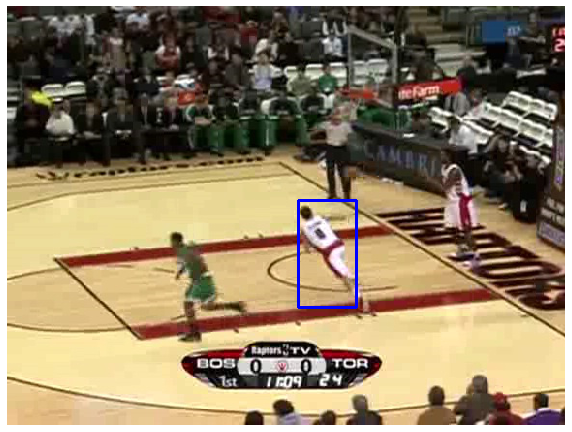

In [30]:
show_single_frame(cv2.rectangle(frames[0].copy(), roi[0], roi[1], (0, 0, 255), 2))

### Perform tracking

**Lucas-Kanade itself**

In [37]:
try:
    rois = lucas_kanade(gray_frames, roi, max_iter=5)
except:
    raise Exception('Something went wrong!')


100%|██████████| 192/192 [01:13<00:00,  2.62it/s]


**Show results**

In [38]:
frames_with_rois = draw_rois(frames, rois)
show_multiply_frames(frames_with_rois)

interactive(children=(IntSlider(value=0, description='frame_num', max=192), Output()), _dom_classes=('widget-i…

### Save result as video

In [39]:
save_video('../videos/lucas_kanade_{}'.format(dataset_name), frames_with_rois)